# Problem StatementThe data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y)..

In [1]:
#Importing the important libraries for the data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import datetime as dt

In [2]:
#Loading the dataset from CSV file
df=pd.read_csv("bank-full.csv", delimiter=';')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Attribute and Description
1. age (numeric)
2. job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self
3. employed','services','student','technician','unemployed','unknown')
4. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
5. education(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
6. default: has credit in default? (categorical: 'no','yes','unknown')
7. housing: has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')

# Related with the last contact of the current campaign
1. contact: contact communication type (categorical: 'cellular','telephone')
2. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
3. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
4. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   

# Other attributes:
1. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
2. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
3. previous: number of contacts performed before this campaign and for this client (numeric)
4. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# Output variable (desired target):
1. y - has the client subscribed a term deposit? (binary: 'yes','no')

# Data Inspection

In [4]:
#Checking the first 5 rows of the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
#Checking the last 5 rows of the data
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
# checking the columns of the dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
#checking the number of rows of the data
df.shape

(45211, 17)

In [8]:
#checking the attributes of the dataset with their dtype in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
#checking for the null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
#Checking for the duplicate values in the dataset
df.duplicated().sum()

0

**Observations**
1. The Data contain 45211 rows and 17 columns in the dataset.
2. There is no null values and also no duplicate values are present in the dataset.
3. Most of the dataset is having numerical values except for the target variable

# Descriptive Analysis
As it was found that our data contains 2 types of the columns which are numerical and categorial

In [11]:
# Checking the Statistical info 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


***Splitting the data into Categorial and Numerical Data***

In [12]:
# Finding categorical variables
categorical_features=[feature for feature in df.columns if (df[feature].dtypes=='O')]
print(f'There are {len(categorical_features)} categorical variables')
categorical_features

There are 10 categorical variables


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [13]:
# Checking the head of the categorical features

df[categorical_features].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [14]:
# Finding numerical variables
numerical_features = [feature for feature in df.columns if (df[feature].dtypes != 'O' )]
print(f'There are {len(numerical_features)} numerical variables')
numerical_features

There are 7 numerical variables


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [15]:
# Checking the head of the numerical features

df[numerical_features].head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


***From above observation it can be said that there are 10 categorial features and 7 numerical features***

# Exploratary Data Analysis
Exploratory data analysis or commonly known as EDA helps to explore data, and possibly formulate hypotheses that might cause new data collection and experiments. EDA build a robust understanding of the data, issues associated with either the info or process. it’s a scientific approach to get the story of the data.

It focuses more narrowly on checking assumptions required for model fitting and hypothesis testing. It also helps while handling missing values and making transformations of variables as needed.

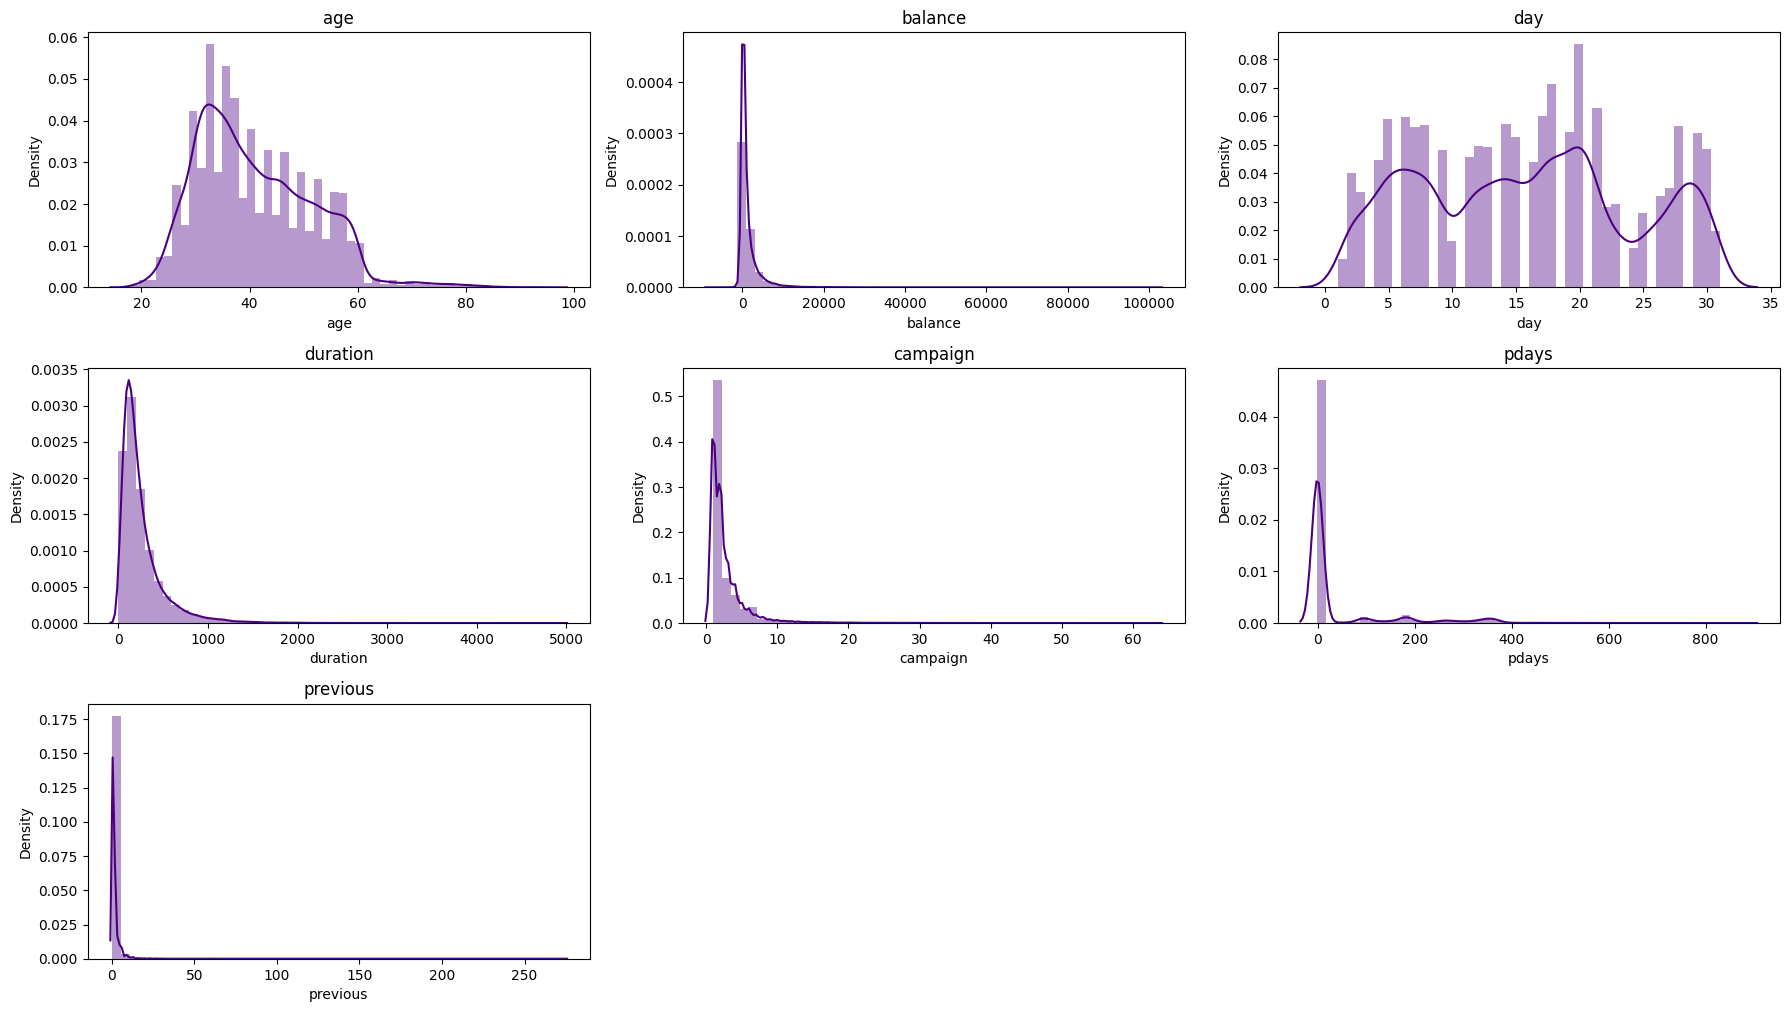

In [16]:
# Distibution plot of Numerical features to check the skewness.

n=1
plt.figure(figsize=(18,40))
for i in numerical_features:
  plt.subplot(12,3,n)
  n= n+1
  sns.distplot(df[i],color='indigo')
  plt.title(i)
  plt.tight_layout()

***We observed from the above distibution plot of numerical features that the attributes balance, duration, campaign, pdays, and previous are right skewed..***

# Outlier Detection

In [17]:
#Finding the Outliers in the dataset

# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Select numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=np.number).columns
# Loop through numerical columns and detect outliers
for col in numerical_cols:
    outliers = detect_outliers_iqr(df[col])
    print("Outliers in column", col, ":", df[col][outliers])

Outliers in column age : 29158    83
29261    75
29263    75
29322    83
29865    75
         ..
45163    71
45191    75
45204    73
45207    71
45208    72
Name: age, Length: 487, dtype: int64
Outliers in column balance : 34       10635
65        6530
69       12223
70        5935
186       4384
         ...  
45164     4655
45181     6879
45185     4256
45191     3810
45208     5715
Name: balance, Length: 4729, dtype: int64
Outliers in column day : Series([], Name: day, dtype: int64)
Outliers in column duration : 37       1666
43       1492
53        787
59       1778
61        812
         ... 
45124     701
45199    1166
45200    1556
45206     977
45208    1127
Name: duration, Length: 3235, dtype: int64
Outliers in column campaign : 758       7
780       8
906       7
1103      8
1105      7
         ..
44666     7
44680     9
44770     9
44886    12
45056     7
Name: campaign, Length: 3064, dtype: int64
Outliers in column pdays : 24060    151
24062    166
24064     91
24072     8

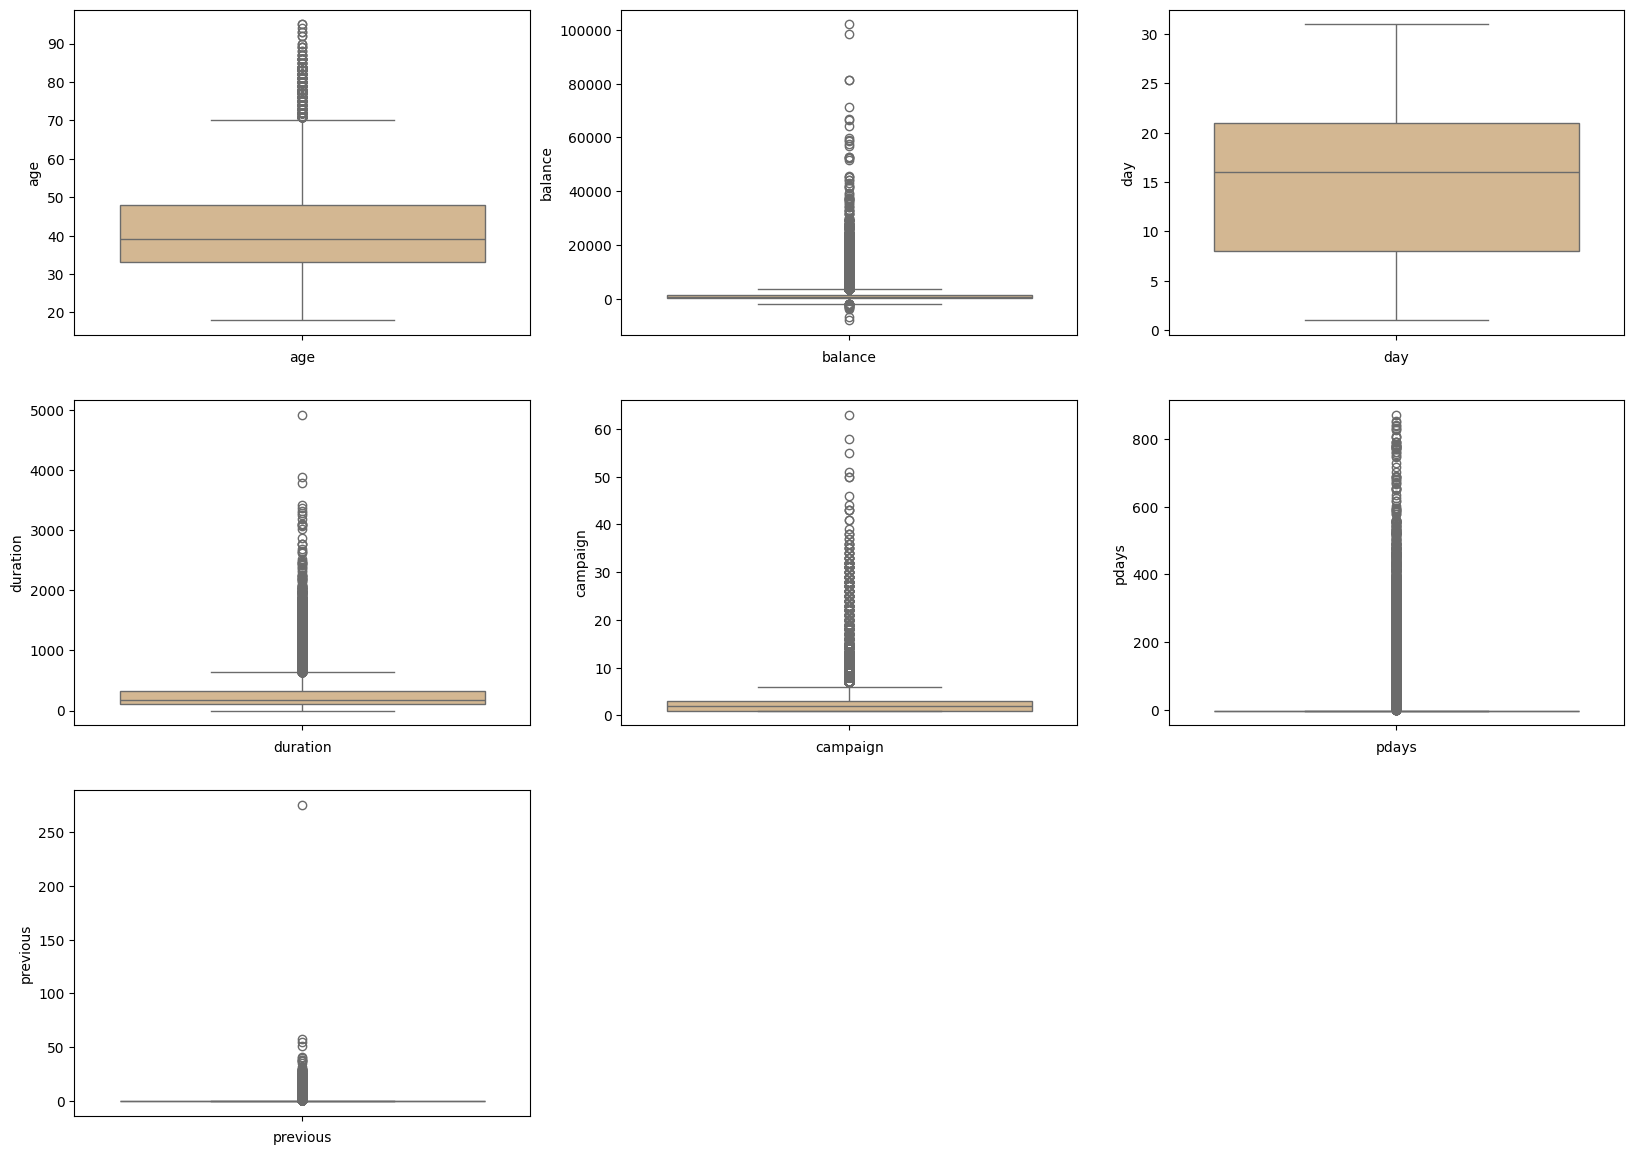

In [18]:
# ploting a boxplot for each numerical feature to check the outliers

plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature], color='#DEB887')
    plt.xlabel(numerical_feature)
    plotnumber += 1
plt.show()

***After plotting the boxplot for the outliers in our dataset, we observed that there are outliers present in all our numerical features except day feature. These outliers requires some treatment for the data stability***

# Bivariate Analysis of Numerical Features with Target Variable

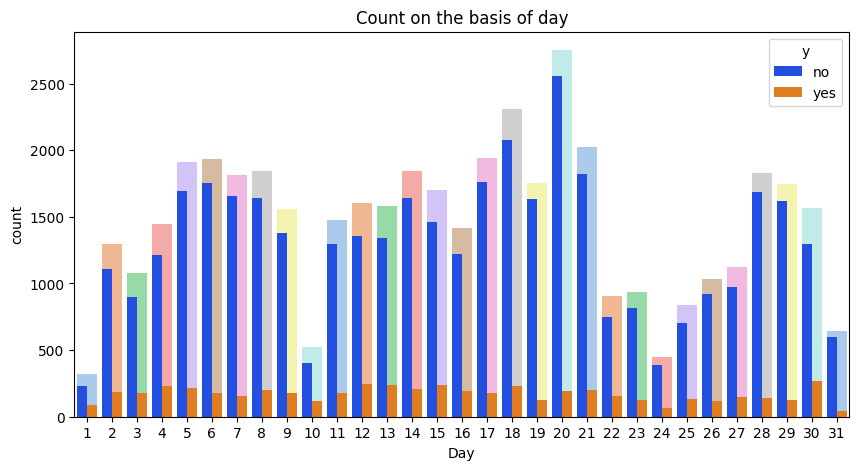

In [19]:
# plotting count plot of days with taget variable

fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(data=df, x='day', palette='pastel', ax=ax)
sns.countplot(data=df, x='day', hue='y', palette='bright', ax=ax)

plt.xlabel('Day')
plt.title('Count on the basis of day')
plt.show()

***we can see that majority of subscription on 20th date of every month followed by 18th & least on 1st & 24th.***



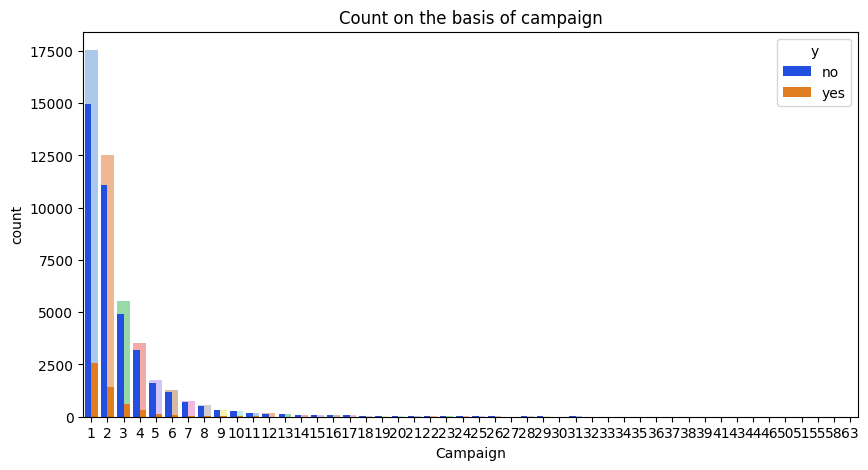

In [20]:
# plotting count plot of campaign with taget variable
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='campaign', palette='pastel', ax=ax)
sns.countplot(data=df, x='campaign', hue='y', palette='bright', ax=ax)
plt.xlabel('Campaign')
plt.title('Count on the basis of campaign')
plt.show()

***People were mostly contacted one time but some people also connect more than once.***

Text(0.5, 1.0, 'Count on the basis of previous')

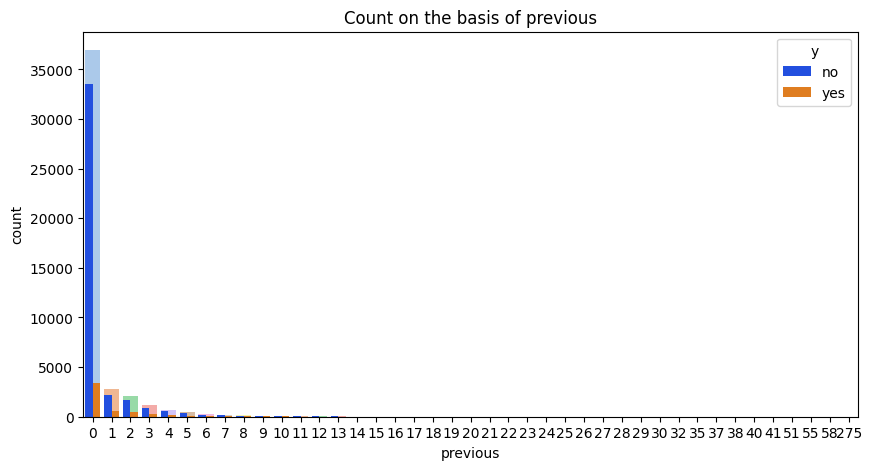

In [21]:
# plotting count plot of previous with taget variable

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data=df,x='previous', ax=ax, palette='pastel')
sns.countplot(data=df,x='previous', hue='y',ax=ax, palette='bright')
plt.xlabel('previous')
plt.title('Count on the basis of previous')

***Observation - We can see above that majority of people were not contacted previously before this campaign and there are no significant contacts after 10 times already done.***

# Checking Multicollinearity
Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.
A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship.

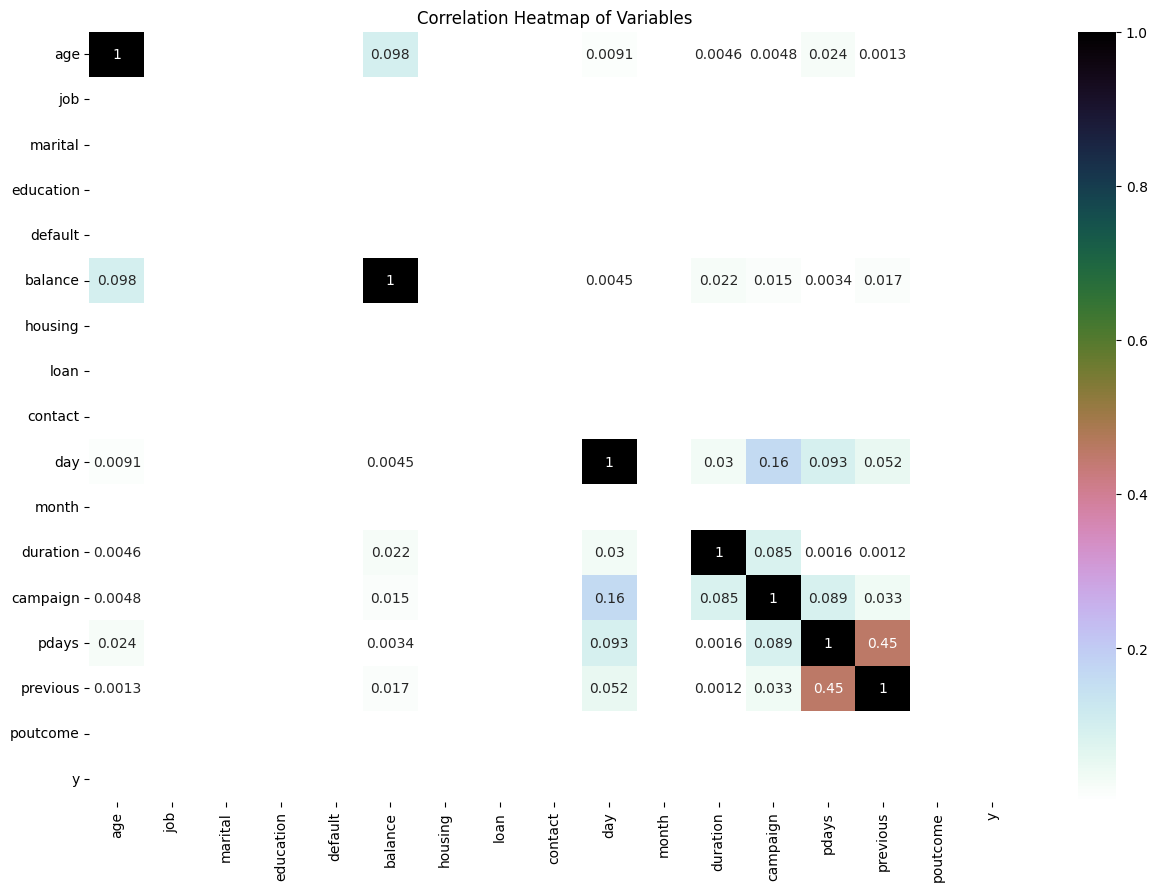

In [22]:
# Ploting correlation graph to check multicollinearity
# Convert non-numeric columns to numeric types
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
corr_matrix = df_numeric.corr()
# Create a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(abs(corr_matrix), cmap= 'cubehelix_r', annot=True)
plt.title('Correlation Heatmap of Variables')
plt.show()

# VIF Calculation
VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.The default VIF cutoff value is 5; only variables with a VIF less than 5 will be included in the model. In some cases VIF of less than 10 is also acceptable.

Here, we have performed the VIF calculations for the clarity about the correlation between the features.

In [23]:
# Importing necessary library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Making function for VIF calculation.

def cal_VIF(F):
 
  
   VIF = pd.DataFrame()
   VIF["variables"] = F.columns
   VIF["VIF"] = [variance_inflation_factor(F.values, i) for i in range(F.shape[1])]
 
   return(VIF)

In [24]:
# Checking the VIF score of all the independent variables.

cal_VIF(df[[i for i in df.describe().columns]])

,variables,VIF
0,age,5.004058
1,balance,1.212908
2,day,3.984268
3,duration,1.901309
4,campaign,1.824694
5,pdays,1.454202
6,previous,1.341641


**From the above datset of the VIF it is clearly visible that all our VIF values are less then 10 so we can conclude that there is no corelation between the attributes.**

# **Bivariate Analysis of Categorical Features with Target Variable**

Text(0.5, 1.0, 'Count of different type of jobs')

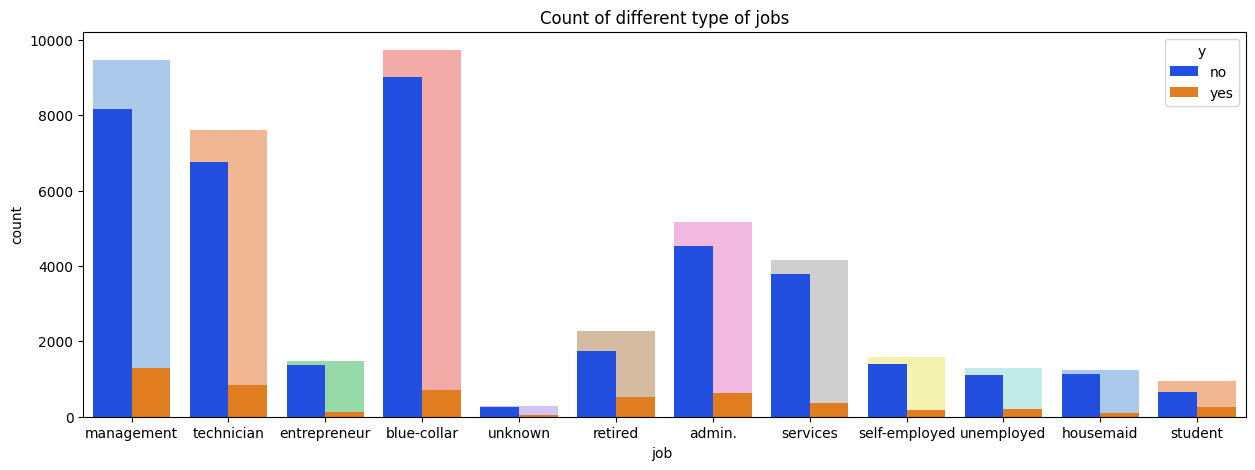

In [25]:
# Lets explore the count of accept and reject term deposit on the basis of different type of job

fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(data=df,x='job', ax=ax, palette='pastel')
sns.countplot(data=df,x='job', hue='y',ax=ax, palette='bright')
plt.xlabel('job ')
plt.title('Count of different type of jobs')

**Observation - Management & Blue-collar have highest value count**

**Blue-collar, management & technician showed maximum interest in subscription.**

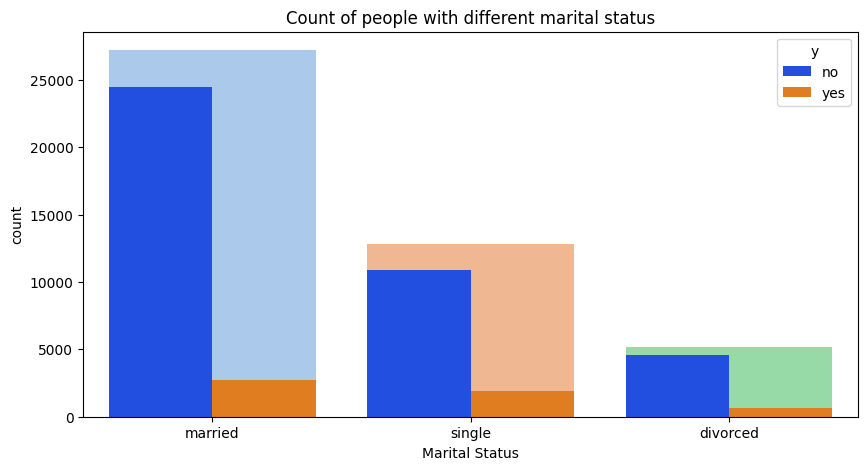

In [26]:
# plotting the count plot of marital status with target variable.

fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(data=df, x='marital', palette='pastel', ax=ax)
sns.countplot(data=df, x='marital', hue='y', palette='bright', ax=ax)

plt.xlabel('Marital Status')
plt.title('Count of people with different marital status')
plt.show()

**observations** - we can see by looking at chart that in maritial status, "**married**" people having the highest number of count in the data set followed by "**single**" and least "**divorced**". 

"**married**" people are also having the maximum number of subscriptions followed by "**single**".

Text(0.5, 1.0, 'Count of yes and no for different education level')

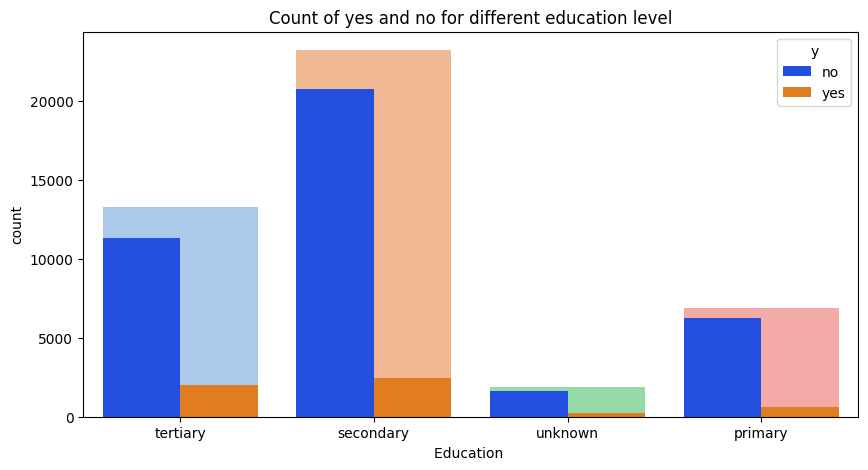

In [27]:
# plotting the count plot of education  with target variable.

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data=df,x='education', ax=ax, palette='pastel')
sns.countplot(data=df,x='education', hue='y',ax=ax, palette='bright')
plt.xlabel('Education ')
plt.title('Count of yes and no for different education level')

**Observation** - Secondary education is having the highest number of count &
People with secondary education were more driven towards subscribe to term deposit in bank as comparison to primary, tertiary and some unknown education.

Text(0.5, 1.0, 'Count of yes and no for different default')

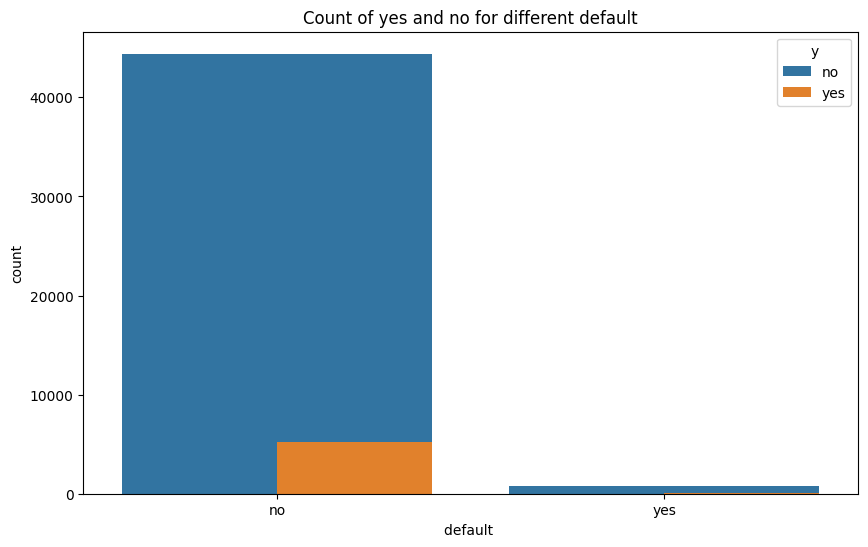

In [28]:
# plotting the count plot of credit card default with target variable.
fig,ax=plt.subplots(figsize=(10,6))
sns.countplot(data=df,x='default',ax=ax)
sns.countplot(data=df,x='default',hue='y',ax=ax)
plt.xlabel('default ')
plt.title('Count of yes and no for different default') 


Observation - we can see by above chart that those who are not defaulter are having more count than those who are defaulters. and those who are not defaulters are likely not intersted in term deposit only some people are intersted in term deposit

Text(0.5, 1.0, 'Count on the basis of month')

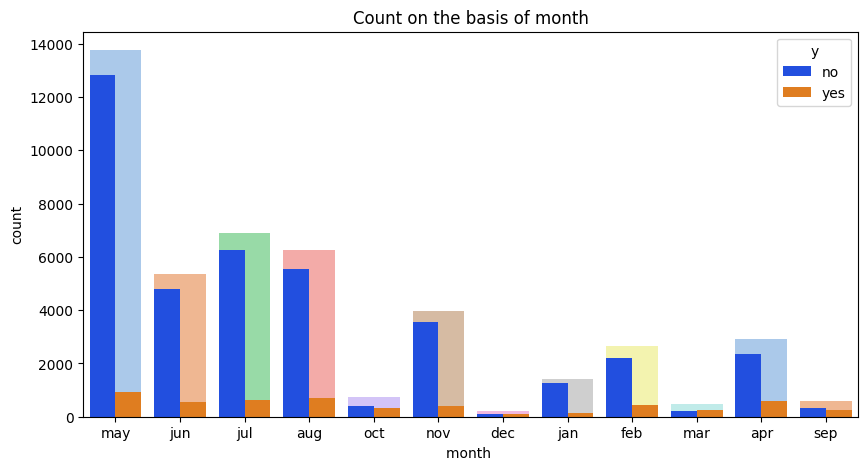

In [29]:
# plotting the count plot of months with target variable.

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data=df,x='month', ax=ax, palette='pastel')
sns.countplot(data=df,x='month', hue='y',ax=ax, palette='bright')
plt.xlabel('month ')
plt.title('Count on the basis of month')

 **Observation** - There were maximum subscriptions in the month of may.

# Treatment of the outliers
***Winsorization***: Winsorization involves replacing extreme values with less extreme values. For example, you can replace outliers with the nearest data points within a certain percentile range.

In [30]:
# Treating outliers using Winsorization
def treat_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    series[series < lower_bound] = lower_bound
    series[series > upper_bound] = upper_bound
    return series

# Applying Winsorization to numeric columns except 'Model' and 'Fuel_Type'
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_cols] = df[numeric_cols].apply(treat_outliers)

In [31]:
#Checking for the outliers after treatment of the outliers in the dataset
for col in numerical_cols:
    outliers = detect_outliers_iqr(df[col])
    print("Outliers in column", col, ":", df[col][outliers])

Outliers in column age : Series([], Name: age, dtype: float64)
Outliers in column balance : Series([], Name: balance, dtype: int64)
Outliers in column day : Series([], Name: day, dtype: int64)
Outliers in column duration : Series([], Name: duration, dtype: int64)
Outliers in column campaign : Series([], Name: campaign, dtype: int64)
Outliers in column pdays : Series([], Name: pdays, dtype: int64)
Outliers in column previous : Series([], Name: previous, dtype: int64)


***Hence the data is cleaned with the outliers and also with teh categorial data in the numeric***

# Feature Engineering
All machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristics to work properly. Here, the need for feature engineering arises. Feature engineering mainly have two goals:

1.Preparing the proper input dataset, compatible with the machine learning algorithm requirements.

2.Improving the performance of machine learning models.

We'll try adding and removing some features in this section in order to make a perfect data matrix we can pass to a machine learning model. We will try to interpret categorical features as numeric to be passed to the ML models.

In [32]:
# finding the dataset with their type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB


In [33]:
# Getting the dummies of all the categorical features

cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df = pd.concat([df.drop(col, axis=1),pd.get_dummies(df[col], 
                            prefix=col, prefix_sep='_',drop_first=True, 
                            dummy_na=False)], axis=1)

In [34]:
# Converting the boolean fearures in binary

bool_columns = ['default', 'housing', 'loan', 'y']
for col in  bool_columns:
    df[col+'_new']=df[col].apply(lambda x : 1 if x == 'yes' else 0)
    df.drop(col, axis=1, inplace=True)

In [35]:
# Define the boolean columns
bool_columns = [
    'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management',
    'job_retired', 'job_self-employed', 'job_services', 'job_student',
    'job_technician', 'job_unemployed', 'job_unknown', 'marital_married',
    'marital_single', 'education_secondary', 'education_tertiary',
    'education_unknown', 'contact_telephone', 'contact_unknown', 'month_aug',
    'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
    'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
    'poutcome_success', 'poutcome_unknown'
]

# Define the boolean mapping
bool_map = {True: 1, False: 0}

# Apply the mapping to each column
for col in bool_columns:
    df[col] = df[col].map(bool_map)


In [36]:
# Renamimg our target variable 'y' to 'Subscribe'

df.rename(columns = {'y_new':'Subscribe'}, inplace = True)

In [37]:
# Checking the info of our dataframe after all the transformations

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   balance              45211 non-null  int64  
 2   day                  45211 non-null  int64  
 3   duration             45211 non-null  int64  
 4   campaign             45211 non-null  int64  
 5   pdays                45211 non-null  int64  
 6   previous             45211 non-null  int64  
 7   job_blue-collar      45211 non-null  int64  
 8   job_entrepreneur     45211 non-null  int64  
 9   job_housemaid        45211 non-null  int64  
 10  job_management       45211 non-null  int64  
 11  job_retired          45211 non-null  int64  
 12  job_self-employed    45211 non-null  int64  
 13  job_services         45211 non-null  int64  
 14  job_student          45211 non-null  int64  
 15  job_technician       45211 non-null 

# Checking the Balance of the dataset
Important thing to make sure before feeding our data into the model is the class distribution of the data. In our case where the expected class are divided into two outcome, positive and negatice, a class distribution of 50:50 is considered ideal

Let’s see how our target variable i.e. class distribution looks like.

Target Variable: the presence of heart attack (class)- (binary: negative and positive)



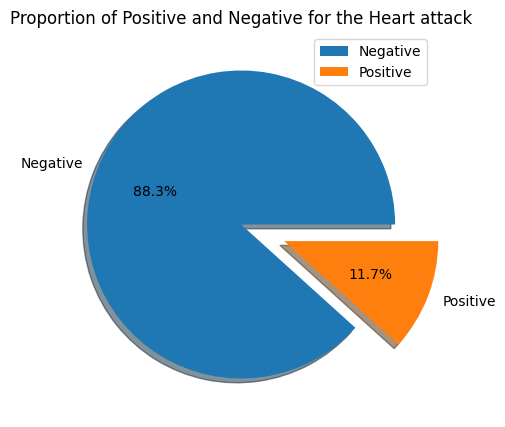

In [38]:
# Ploting the pie chart to check the balance in the Target Variable.

plt.figure(figsize=(7,5), dpi=100)
proportion = df['Subscribe'].value_counts()
labels = ['Negative','Positive']
plt.title('Proportion of Positive and Negative for the Heart attack')
plt.pie(proportion, explode=(0,0.3),labels=labels, shadow = True, autopct = '%1.1f%%')
plt.legend()
plt.show()

In [39]:
# Checking the count of the classes in the target variable.

df['Subscribe'].groupby(df['Subscribe']).count()

Subscribe
0    39922
1     5289
Name: Subscribe, dtype: int64

***Hence from the above it can be observed that the target variable is not evenly distributed***

# Train Test Split dataset

In [40]:
#Importing the Train test library for the extraction
from sklearn.model_selection import train_test_split

In [41]:
# Data for all the independent variables
X = df.drop(['Subscribe'],axis=1)

# Data for the dependent variable
y = df['Subscribe']

# Dividing the data in training and test dataset.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# checking the shape of our train and test data.
print(X_train.shape)
print(X_test.shape)

(36168, 42)
(9043, 42)


# Handling the Imbalance in the dataset using SMOTE
SMOTE addresses this issue by generating synthetic examples for the minority class. It works by creating synthetic samples that are similar to existing minority class samples, thus effectively oversampling the minority class. This helps to balance the class distribution in the dataset, making it more suitable for training classification models.

The synthetic samples are generated by selecting a minority class instance and its k nearest neighbors in the feature space. Then, new instances are created along the line segments joining these nearest neighbors. The number of synthetic samples created for each minority class instance is controlled by the sampling_strategy parameter.

In [42]:
#Importing the SMOTE from library
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_rs, y_train_rs = smote.fit_resample(X_train, y_train)

In [43]:
print(f'The length of the original dataset: {len(X_train)}')
print(f'The length of the original dataset: {len(X_train_rs)}')

The length of the original dataset: 36168
The length of the original dataset: 63884


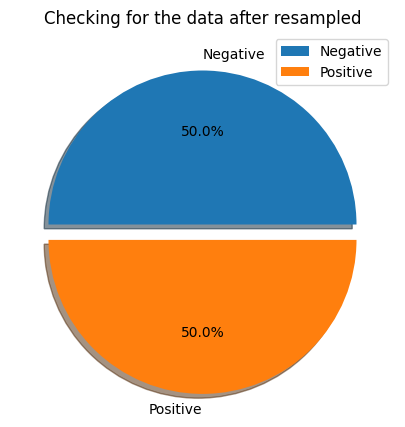

In [44]:
# Ploting the count plot to check the balance after handling imbalance.
plt.figure(figsize=(7,5), dpi=100)
proportion = y_train_rs.value_counts()
labels = ['Negative','Positive']
plt.title('Checking for the data after resampled')
plt.pie(proportion, explode=(0,0.1),labels=labels, shadow = True, autopct = '%1.1f%%')
plt.legend()
plt.show()

***After Resampling of data by using SMOTE the target feature is set to 50:50 which is very good for the accuracy***

# Scaling our dataset
***Scaling our dataset using MinMaxScaler***

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
#Transforming the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_rs)
X_test = scaler.transform(X_test)

# Performance Metrics
Different performance metrics are used to evaluate machine learning model. Based on our task we can choose our performance metrics. Since our task is of classification and that too binary class classification, whether client will or will not subscribe for deposits.

Here we will be using AUC ROC

ROC also known as Receiver Operating Characteristics, shows the performance of binary class classifiers across the range of all possible thresholds plotting between true positive rate and 1-false positive rate.

AUC measures the likelihood of two given random points, one from positive and one from negative, the classifier will rank the positive points above negative points. AUC-ROC is popular classification metric that presents the advantage of being independent of false positive or negative points.

Secondary Performance Metrics

Macro-F1 Score: F1 score is the harmonic mean between Precision and Recall. Macro F1 score is used to know how our model works in overall dataset.

Confusion Matrix: This matrix gives the count of true negative, true positive, false positive and false negative data points.

# Models
Following models have been used for predictions:-
1. Logistic Regression Classifier
2. Decision Tree Classifier
3. Random Forest Classifier
4. K-Nearest Neighbors Classifier
5. Naive Bayes Classifier
6. Support Vector Machine Classifier
7. LGBM Classifier


# Logistic Regression Classifier
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Logistic Regression is used when the dependent variable(target) is categorical. The model delivers a binary or dichotomous outcome limited to two possible outcomes: yes/no, 0/1, or true/false.

Logical regression analyzes the relationship between one or more independent variables and classifies data into discrete classes. It is extensively used in predictive modeling, where the model estimates the mathematical probability of whether an instance belongs to a specific category or not.

For example, 0 – represents a negative class; 1 – represents a positive class. Logistic regression is commonly used in binary classification problems where the outcome variable reveals either of the two categories (0 and 1).

Typical properties of the logistic regression equation include:

Logistic regression’s dependent variable obeys ‘Bernoulli distribution’

Estimation/prediction is based on ‘maximum likelihood.’

Logistic regression does not evaluate the coefficient of determination (or R squared) as observed in linear regression’. Instead, the model’s fitness is assessed through a concordance.

In [47]:
# Importing important library

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

In [48]:
# Creating model object for logistic regression.

lrc = LogisticRegression(fit_intercept=True, max_iter=10000)

In [49]:
#fitting the dataset in the model
lrc.fit(X_train_rs,y_train_rs)

LogisticRegression(max_iter=10000)

In [50]:
#Predictions of test data
lrc_test_pred=lrc.predict(X_test)
#Prediction of Train Data
lrc_train_pred=lrc.predict(X_train_rs)

In [51]:
# Getting the accuracy scores for training and testing set.

train_accuracy = accuracy_score(lrc_train_pred, y_train_rs)
test_accuracy = accuracy_score(lrc_test_pred, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9265387264416756
The accuracy on test data is  0.8822293486674776


In [52]:
# Confusion Matrix for logistic regression classifier.

cf_matrix = confusion_matrix(y_test,lrc_test_pred)
cf_matrix

array([[7968,   12],
       [1053,   10]], dtype=int64)

In [53]:
#Creating the function for plotting the confusion matrix
def plot_confusion_matrix(cf_matrix, title='Confusion Matrix', cmap='Blues'):
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap=cmap, ax=ax)
    ax.xaxis.set_ticklabels(['False', 'True'])
    ax.yaxis.set_ticklabels(['False', 'True'])
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    ax.set_title(title)
    plt.show()
    


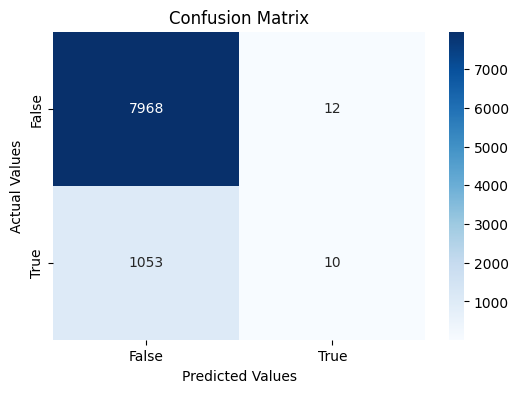

In [54]:
#Plotting Confusion matrix
plot_confusion_matrix(cf_matrix)

In [55]:
# Getting classification report.

dict_1 = classification_report(y_test, lrc_test_pred, output_dict = True)
dict_1

{'0': {'precision': 0.8832723644828733,
  'recall': 0.9984962406015038,
  'f1-score': 0.9373566260808188,
  'support': 7980.0},
 '1': {'precision': 0.45454545454545453,
  'recall': 0.00940733772342427,
  'f1-score': 0.018433179723502304,
  'support': 1063.0},
 'accuracy': 0.8822293486674776,
 'macro avg': {'precision': 0.6689089095141639,
  'recall': 0.503951789162464,
  'f1-score': 0.4778949029021606,
  'support': 9043.0},
 'weighted avg': {'precision': 0.8328757366753452,
  'recall': 0.8822293486674776,
  'f1-score': 0.829337647481037,
  'support': 9043.0}}

In [56]:
# Dataframe to contain Model performance analysis reports.
res_df = pd.DataFrame()

In [57]:
# Appending the scores in the dataframe.

tempodf=pd.DataFrame(dict_1).transpose()
tempodf['Model'] = 'Logistic Regression Classifier'
res_df = pd.concat([res_df, tempodf[2:-2]])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.882229,0.882229,0.882229,0.882229,Logistic Regression Classifier


# Decision Tree Classifier
Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

Decision trees are upside down which means the root is at the top and then this root is split into various several nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.

In a Decision Tree diagram, we have:

Root Node: The first split which decides the entire population or sample data should further get divided into two or more homogeneous sets. In our case, the Outlook node.

Splitting: It is a process of dividing a node into two or more sub-nodes.

Decision Node: This node decides whether/when a sub-node splits into further sub-nodes or not. Here we have, Outlook node, Humidity node, and Windy node.

Leaf: Terminal Node that predicts the outcome (categorical or continuous value). The coloured nodes, i.e., Yes and No nodes, are the leaves.

In [58]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model=DecisionTreeClassifier()

In [59]:
# Parameters for the model for hyper parameter tuning
parameters = {'max_depth' : [4,6,8,10],
              'min_samples_split' : [10,20,30,40,50],
              'min_samples_leaf' : [10,15,20]}

In [60]:
dt = GridSearchCV(model, parameters, scoring='roc_auc', cv=2)

In [61]:
dt.fit(X_train_rs,y_train_rs)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             scoring='roc_auc')

In [62]:
dt.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=50)

In [63]:
# Getting the predicted classes for training and testing set

dt_train_pred = dt.predict(X_train_rs)
dt_test_pred = dt.predict(X_test)

In [64]:
# Getting the accuracy scores for training and testing set.

train_accuracy_dt = accuracy_score(dt_train_pred, y_train_rs)
test_accuracy_dt = accuracy_score(dt_test_pred, y_test)

# Display accuracies.
print("The accuracy on train data is ", train_accuracy_dt)
print("The accuracy on test data is ", test_accuracy_dt)

The accuracy on train data is  0.9229071441988604
The accuracy on test data is  0.8590069667145859


In [65]:
# Confusion Matrix for Decision Tree classifier.

cf_matrix = confusion_matrix(y_test,dt_test_pred)
cf_matrix

array([[7733,  247],
       [1028,   35]], dtype=int64)

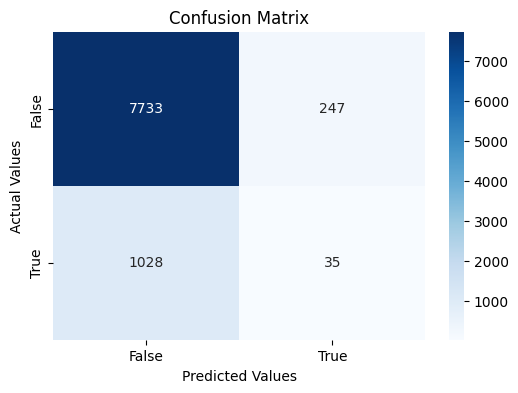

In [66]:
#Plotting the confusion matrix
plot_confusion_matrix(cf_matrix)

In [67]:
dict_2 = classification_report(y_test, dt_test_pred, output_dict = True)

In [68]:
# Appending the scores in the dataframe.
tempodf=pd.DataFrame(dict_2).transpose()
tempodf['Model'] = 'Decision Tree Classifier'
res_df = pd.concat([res_df, tempodf[2:-2]])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.882229,0.882229,0.882229,0.882229,Logistic Regression Classifier
accuracy,0.859007,0.859007,0.859007,0.859007,Decision Tree Classifier


# Random Forest Classifier
Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.

As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output.

Random forests use the bagging method. It creates a subset of the original dataset, and the final output is based on majority ranking and hence the problem of overfitting is taken care of.

In [69]:
#Importing the model from library
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf_model=RandomForestClassifier()

In [71]:
# Storing the hyperparameters in Dict

params = {'n_estimators' : [750, 850],
         'max_depth': [7,9],
         'max_features' : [7,8],
         'min_samples_leaf' : [2,3]}

In [72]:
#Using GridSearchCV for hyperparameter tuning

rfc = GridSearchCV(rf_model, param_grid = params, scoring = 'roc_auc', cv =2)

In [73]:
rfc.fit(X_train_rs,y_train_rs)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 9], 'max_features': [7, 8],
                         'min_samples_leaf': [2, 3],
                         'n_estimators': [750, 850]},
             scoring='roc_auc')

In [74]:
#Finding the best estimator of the model
rfc.best_estimator_

RandomForestClassifier(max_depth=9, max_features=8, min_samples_leaf=2,
                       n_estimators=850)

In [75]:
#Predicting the model with traub abd test data
rfc_train_pred=rfc.predict(X_train_rs)
rfc_test_pred=rfc.predict(X_test)

In [76]:
#Finding of the accuracy score for both test and train data
rf_train_accuracy=accuracy_score(rfc_train_pred,y_train_rs)
rf_test_accuracy=accuracy_score(rfc_test_pred,y_test)

In [77]:
# print the accuracy of the model
print(f'The accuracy of test data is: {rf_train_accuracy}.')
print(f'The accuracy of train data is: {rf_test_accuracy}.')

The accuracy of test data is: 0.9285267046521821.
The accuracy of train data is: 0.8817870175826606.


In [78]:
# Confusion Matrix for Random forest classifier.

cf_matrix = confusion_matrix(y_test,rfc_test_pred)
cf_matrix

array([[7947,   33],
       [1036,   27]], dtype=int64)

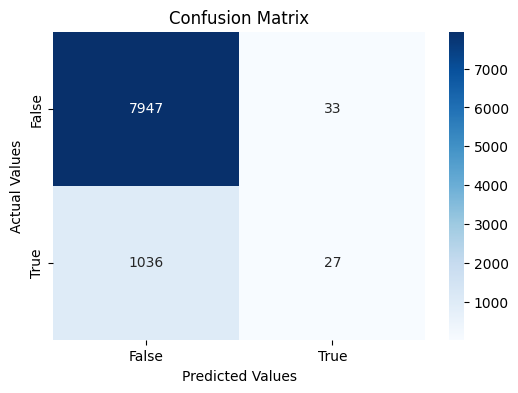

In [79]:
# plotting the confusion matrix
plot_confusion_matrix(cf_matrix)

In [80]:
dict_3 = classification_report(y_test, rfc_test_pred, output_dict = True)

In [81]:
# Appending the scores in the dataframe.
tempodf=pd.DataFrame(dict_3).transpose()
tempodf['Model'] = 'Random forest Classifier'
res_df = pd.concat([res_df, tempodf[2:-2]])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.882229,0.882229,0.882229,0.882229,Logistic Regression Classifier
accuracy,0.859007,0.859007,0.859007,0.859007,Decision Tree Classifier
accuracy,0.881787,0.881787,0.881787,0.881787,Random forest Classifier


# **K- Nearest Neighbors Classifier**

KNN which stands for K-Nearest Neighbours is a simple algorithm that is used for classification and regression problems in Machine Learning. KNN is also non-parametric which means the algorithm does not rely on strong assumptions instead tries to learn any functional form from the training data.

Unlike most of the algorithms with complex names, which are often confusing as to what they really mean, KNN is pretty straight forward. The algorithm considers the k nearest neighbours to predict the class or value of a data point.

*The kNN working can be explained on the basis of the below algorithm:*

* <b>Step-1:</b> Select the number K of the neighbors
* <b>Step-2:</b> Calculate the Euclidean distance of K number of neighbors
* <b>Step-3:</b> Take the K nearest neighbors as per the calculated Euclidean distance.
* <b>Step-4:</b> Among these k neighbors, count the number of the data points in each category.
* <b>Step-5:</b> Assign the new data points to that category for which the number of the neighbor is maximum.
* <b>Step-6:</b> Our model is ready.

In [82]:
# Importing necessary library

from sklearn.neighbors import KNeighborsClassifier

In [83]:
#Creating an instance for the KNN classifier.

model = KNeighborsClassifier()

In [84]:
# Using hyperparameter tuning to get the opimal value of n_neighbors

parameters = {'n_neighbors':np.arange(1,50,2)}

knn = GridSearchCV(model, cv = 5, param_grid = parameters)

In [85]:
#Fitting the train data with model
knn.fit(X_train_rs,y_train_rs)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])})

In [86]:
# Checking the best parameter.

knn.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [87]:
# Prediction of the test and train data
knn_train_pred=knn.predict(X_train_rs)
knn_test_pred=knn.predict(X_test)

In [88]:
#Finding the accuracy of the model
knn_train_accuracy=accuracy_score(knn_train_pred,y_train_rs)
knn_test_accuracy=accuracy_score(knn_test_pred,y_test)

In [89]:
#Printing the accuracy score of the model
print(f'The Train accuracy of the model: {knn_train_accuracy}.')
print(f'The Test accuracy of the model: {knn_test_accuracy}')

The Train accuracy of the model: 1.0.
The Test accuracy of the model: 0.8824505142098861


In [90]:
# Confusion Matrix for KNN classifier.
knn_cf_matrix = confusion_matrix(y_test,knn_test_pred)
knn_cf_matrix

array([[7980,    0],
       [1063,    0]], dtype=int64)

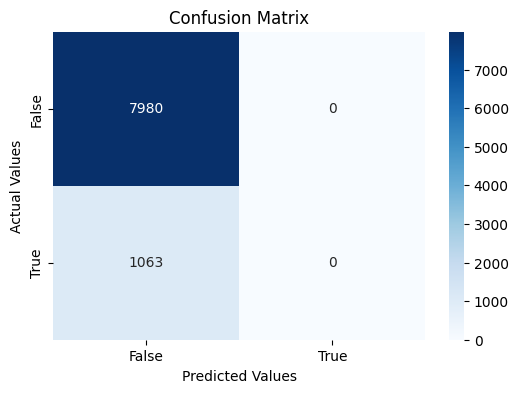

In [91]:
#Plotting the confusion matrix of model
plot_confusion_matrix(knn_cf_matrix)

In [92]:
dict_4 = classification_report(y_test,knn_test_pred, output_dict = True)

In [93]:
# Appending the scores in the dataframe.
tempodf=pd.DataFrame(dict_4).transpose()
tempodf['Model'] = 'KNN'
res_df = pd.concat([res_df, tempodf[2:-2]])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.882229,0.882229,0.882229,0.882229,Logistic Regression Classifier
accuracy,0.859007,0.859007,0.859007,0.859007,Decision Tree Classifier
accuracy,0.881787,0.881787,0.881787,0.881787,Random forest Classifier
accuracy,0.882451,0.882451,0.882451,0.882451,KNN


# **Naive Bayes Classifier**

The Naïve Bayes algorithm is a classification technique based on the Bayes’ Theorem which assumes there is independence between the features. We interfere with applications utilizing this algorithm on a daily basis, for example it powers recommendation systems for streaming applications or adds on social media as well as many online retail websites.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods. Let’s have a look under the hood of this major classifier.

The simple form of the calculation for Bayes Theorem is as follows:

**P(A|B) = P(B|A) * P(A) / P(B)**

In [94]:
#Importing Necessary library

from sklearn.naive_bayes import GaussianNB

In [95]:
# Defining Grid Search Parameters
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

In [96]:
#Using GridSearchCV for the hyperparameter tuning
nbc_model = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, cv=2, n_jobs=-1)

In [97]:
# Fitting the model

nbc_model.fit(X_train_rs, y_train_rs)

GridSearchCV(cv=2, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [98]:
# Checking the best parameters

nbc_model.best_estimator_

GaussianNB(var_smoothing=1.519911082952933e-08)

In [99]:
# Getting the predicted classes for training and testing set
nbc_train_pred=nbc_model.predict(X_train_rs)
nbc_test_pred=nbc_model.predict(X_test)

In [100]:
# Getting the accuracy scores for training and testing set.
nbc_train_accuracy=accuracy_score(y_train_rs,nbc_train_pred)
nbc_test_accuracy=accuracy_score(y_test,nbc_test_pred)

In [101]:
#Printing the accuracy score
print(f'The Train accuracy of the model: {nbc_train_accuracy}.')
print(f'The Test accuracy of the model: {nbc_test_accuracy}.')

The Train accuracy of the model: 0.8852294784296537.
The Test accuracy of the model: 0.7704301669799846.


In [102]:
#Making the confusion matrix of the model
nbc_cf_matrix=confusion_matrix(y_test,nbc_test_pred)
nbc_cf_matrix

array([[6439, 1541],
       [ 535,  528]], dtype=int64)

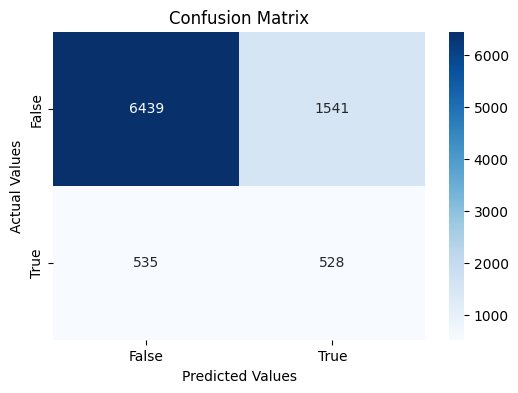

In [103]:
#Plotting the confusion matrix of the model
plot_confusion_matrix(nbc_cf_matrix)

In [104]:
dict_5=classification_report(y_test,nbc_test_pred,output_dict=True)

In [105]:
# Appending the scores in the dataframe.
tempodf=pd.DataFrame(dict_5).transpose()
tempodf['Model'] = 'Naive Bayes Classifier'
res_df = pd.concat([res_df, tempodf[2:-2]])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.882229,0.882229,0.882229,0.882229,Logistic Regression Classifier
accuracy,0.859007,0.859007,0.859007,0.859007,Decision Tree Classifier
accuracy,0.881787,0.881787,0.881787,0.881787,Random forest Classifier
accuracy,0.882451,0.882451,0.882451,0.882451,KNN
accuracy,0.770430,0.770430,0.770430,0.770430,Naive Bayes Classifier


# **Support Vector Machine Classifier**

SVM is a powerful supervised algorithm that works best on smaller datasets but on complex ones. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks, but generally, they work best in classification problems.

**Support Vectors:** These are the points that are closest to the hyperplane. A separating line will be defined with the help of these data points.

**Margin:** it is the distance between the hyperplane and the observations closest to the hyperplane (support vectors). In SVM large margin is considered a good margin. There are two types of margins hard margin and soft margin.

In [106]:
# Importing Support vector machine Classifier.

from sklearn import svm

In [107]:
# Create a svm Classifier

svm= svm.SVC(kernel='poly')

In [108]:
# Fitting the model with training set

svm.fit(X_train_rs, y_train_rs)

SVC(kernel='poly')

In [109]:
#Getting Prediction of the train and test data
svm_train_pred=svm.predict(X_train_rs)
svm_test_pred=svm.predict(X_test)

In [110]:
#Getting the accuracy score of the train and test data
svm_train_accuracy=accuracy_score(y_train_rs,svm_train_pred)
svm_test_accuracy=accuracy_score(y_test,svm_test_pred)

In [111]:
#Printing the accuracy score of the the train and test data
print(f'The test accuracy of the model: {svm_test_accuracy}.')
print(f'The train accuracy of the model: {svm_train_accuracy}.')

The test accuracy of the model: 0.8824505142098861.
The train accuracy of the model: 0.7043704213887672.


In [112]:
#Making the confusion matrix of test data
svm_cnf_matrix=confusion_matrix(y_test,svm_test_pred)
svm_cnf_matrix

array([[7980,    0],
       [1063,    0]], dtype=int64)

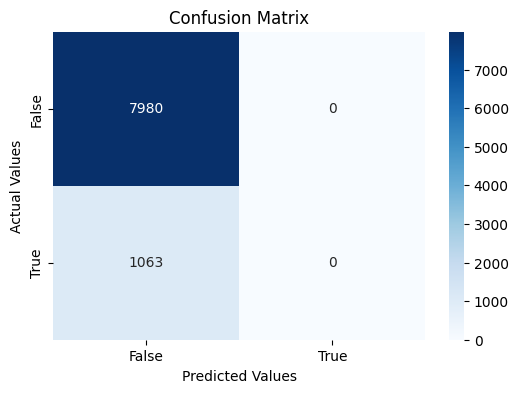

In [113]:
#Plotting the confusion matrix of the data
plot_confusion_matrix(svm_cnf_matrix)

In [116]:
dict_6=classification_report(y_test,svm_test_pred,output_dict=True)

In [115]:
# Appending the scores in the dataframe.
tempodf=pd.DataFrame(dict_6).transpose()
tempodf['Model'] = 'Support Vector (SVM)'
res_df = pd.concat([res_df, tempodf[2:-2]])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.882229,0.882229,0.882229,0.882229,Logistic Regression Classifier
accuracy,0.859007,0.859007,0.859007,0.859007,Decision Tree Classifier
accuracy,0.881787,0.881787,0.881787,0.881787,Random forest Classifier
accuracy,0.882451,0.882451,0.882451,0.882451,KNN
accuracy,0.770430,0.770430,0.770430,0.770430,Naive Bayes Classifier
accuracy,0.882451,0.882451,0.882451,0.882451,Support Vector (SVM)


In [119]:
from tabulate import tabulate
print('Comparision of the different models with the accuracy')
print(tabulate(res_df, headers='keys', tablefmt='fancy_grid'))

Comparision of the different models with the accuracy
╒══════════╤═════════════╤══════════╤════════════╤═══════════╤════════════════════════════════╕
│          │   precision │   recall │   f1-score │   support │ Model                          │
╞══════════╪═════════════╪══════════╪════════════╪═══════════╪════════════════════════════════╡
│ accuracy │    0.882229 │ 0.882229 │   0.882229 │  0.882229 │ Logistic Regression Classifier │
├──────────┼─────────────┼──────────┼────────────┼───────────┼────────────────────────────────┤
│ accuracy │    0.859007 │ 0.859007 │   0.859007 │  0.859007 │ Decision Tree Classifier       │
├──────────┼─────────────┼──────────┼────────────┼───────────┼────────────────────────────────┤
│ accuracy │    0.881787 │ 0.881787 │   0.881787 │  0.881787 │ Random forest Classifier       │
├──────────┼─────────────┼──────────┼────────────┼───────────┼────────────────────────────────┤
│ accuracy │    0.882451 │ 0.882451 │   0.882451 │  0.882451 │ KNN                

# Conclusion

* The 2nd quarter of the year has the highest number of subscriptions & Month of May has the maximum subscriptions.
* Blue-collar, management and technician showed maximum interest in subscription.
* Compared to married and single, Divorced people have less interest in term deposits.
* People with secondary education followed by tertiary education were subscribed to term deposit.
* Generally people who don't have credit in default are interested in a deposit. Majority of the people have a home loan but only few of them opted for a term deposit.
* Cellular communication is seen as more effective in comparison to other communication types.
* The calls with large duration have more tendency for conversion. Majority of people were not contacted previously before this campaign.
* We can choose "KNSupport Vector Machine (SVM)**on Tree" to predict Effectiveness as both of them are showing same accuracy of  **88%** & F1- Score of  **(0.8824)**.